# Week No.9 The Developers Arena Internship Task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
path = r"../Datasets/house_prices.csv"

In [4]:
# Load the dataset
df = pd.read_csv(path)

In [5]:
df.head()

,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
0,PROP0001,3712,4,3,36,Rural,House,22260000
1,PROP0002,1591,4,1,35,Suburb,House,16057500
2,PROP0003,1646,4,3,20,Rural,Villa,12730000
3,PROP0004,4814,1,2,13,City Center,Villa,50840000
4,PROP0005,800,4,2,38,Suburb,Apartment,10650000


In [6]:
df.tail()

,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
295,PROP0296,1450,4,1,0,Suburb,Villa,17625000
296,PROP0297,3866,1,2,16,City Center,Apartment,41060000
297,PROP0298,1970,3,1,6,Rural,Apartment,13050000
298,PROP0299,4243,3,2,7,Rural,Villa,24865000
299,PROP0300,2013,1,2,19,Suburb,Apartment,16672500


In [7]:
df.isnull().sum() # checking the missing values in the dataset

Property_ID      0
Area             0
Bedrooms         0
Bathrooms        0
Age              0
Location         0
Property_Type    0
Price            0
dtype: int64

In [8]:
df.duplicated().sum() # checking the duplicate values

np.int64(0)

In [9]:
# --- 1. Exploratory Data Analysis (EDA) ---

Text(0, 0.5, 'Frequency')

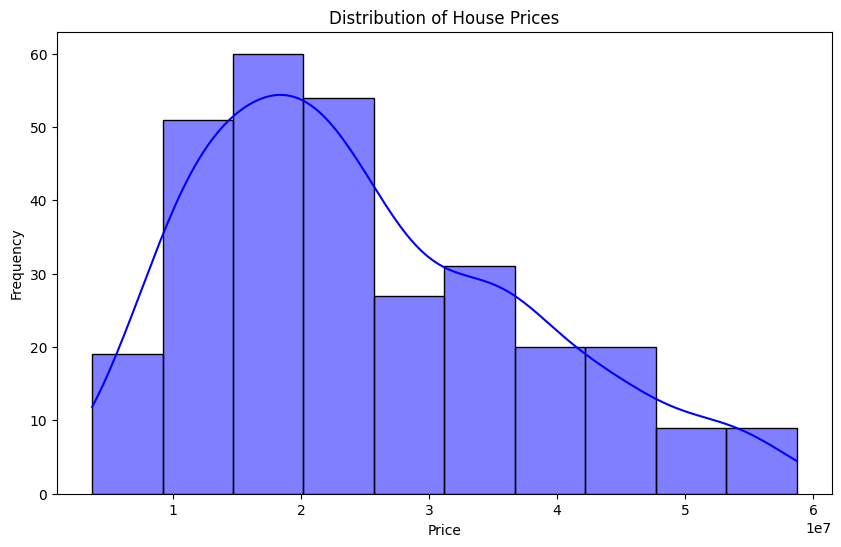

In [10]:
# Distribution of Target Variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

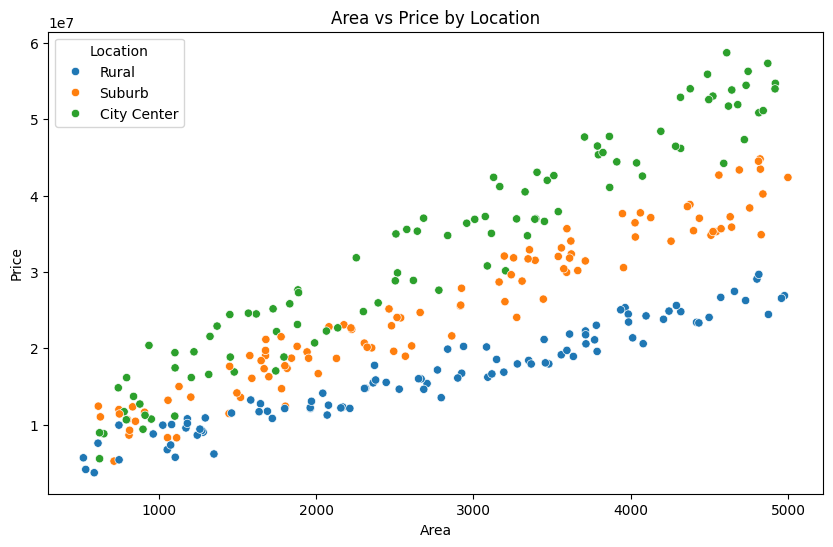

In [11]:
# Relationship: Area vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area', y='Price', hue='Location')
plt.title('Area vs Price by Location')
plt.savefig('area_vs_price.png')

Text(0.5, 1.0, 'Property Type vs Price')

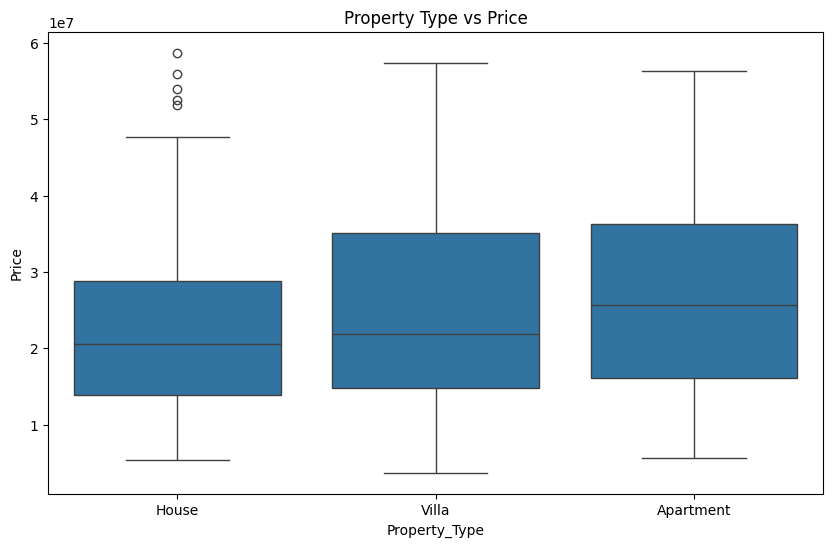

In [13]:
# Relationship: Property Type vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Property_Type', y='Price')
plt.title('Property Type vs Price')

Text(0.5, 1.0, 'Correlation Heatmap')

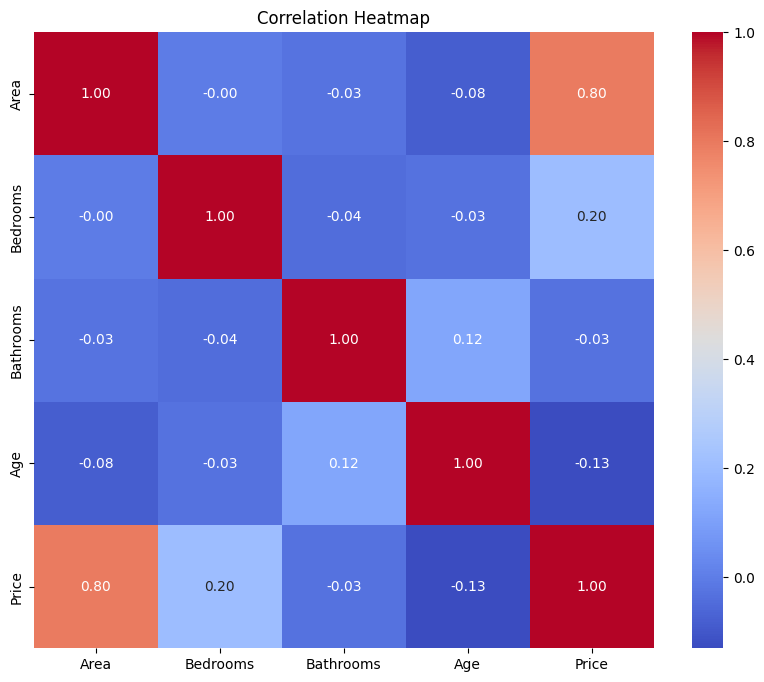

In [14]:
# Correlation Matrix (Numerical only)
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

In [15]:
# --- 2. Data Preprocessing & Model Training ---

In [16]:
# Define Features and Target
X = df.drop(['Property_ID', 'Price'], axis=1)
y = df['Price']

In [17]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Define categorical and numerical features
categorical_features = ['Location', 'Property_Type']
numerical_features = ['Area', 'Bedrooms', 'Bathrooms', 'Age']

In [19]:
# Preprocessing: OneHotEncode categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)


In [20]:
# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [21]:
# Train the model
model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers conta

In [22]:
# --- 3. Predictions and Evaluation ---

In [23]:
y_pred = model.predict(X_test)

In [24]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [25]:
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 2,188,736.34
Mean Squared Error (MSE): 8,454,330,868,275.78
Root Mean Squared Error (RMSE): 2,907,633.21
R2 Score: 0.9406


In [26]:
# --- 4. Visualize Results ---

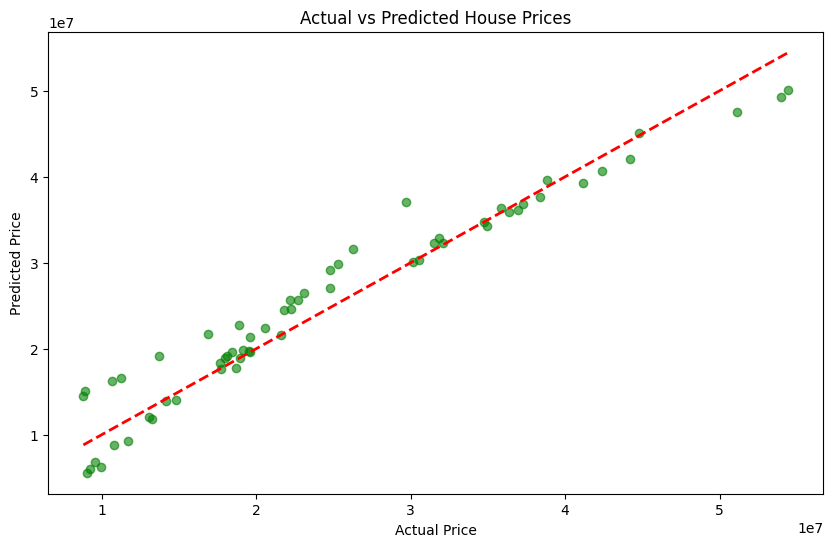

In [27]:
# Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.savefig('actual_vs_predicted.png')

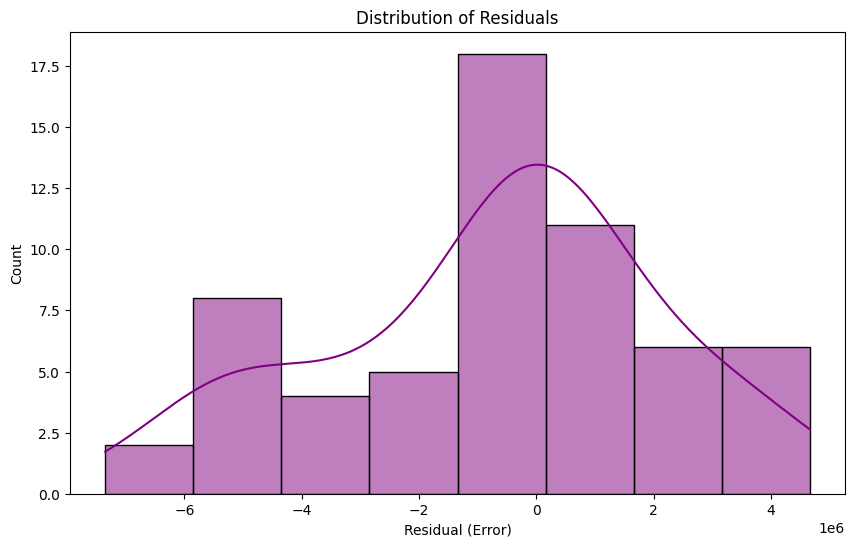

In [28]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residual (Error)')
plt.savefig('residuals_dist.png')